In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

AttributeError: module 'numpy' has no attribute '__version__'

In [8]:
df = pd.read_csv("homeprices.csv")
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


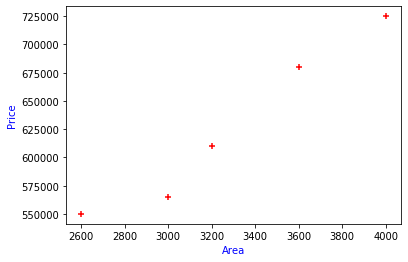

In [17]:
%matplotlib inline
plt.xlabel("Area",color = 'blue')
plt.ylabel("Price", color = 'blue')
plt.scatter(df.area,df.price,color = 'red',marker = '+')

In [38]:
area = df.drop('price', axis = 'columns')
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [42]:
price= df.price
price


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [43]:
#creating object of linear regression
reg = linear_model.LinearRegression()

#training model with above data
reg.fit(area, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
reg.predict([[3300]])

array([628715.75342466])

In [47]:
#to check x and y intercept

reg.coef_

array([135.78767123])

In [48]:
reg.intercept_


180616.43835616432

In [49]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [51]:
# predicting list of prices from given area
#read csv files with given areas

new_areas_file = pd.read_csv("area.csv")
new_areas_file

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [52]:
p = reg.predict(new_areas_file)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [55]:
#creating output csv file 
new_areas_file['prices'] = p
new_areas_file

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [57]:
new_areas_file.to_csv("output_linear_Regression.csv")

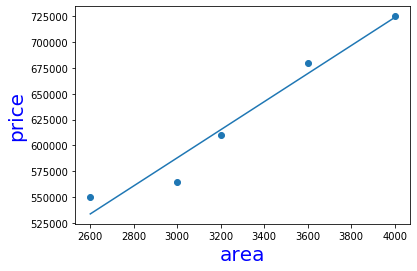

In [62]:
#plotiing linear regression line
%matplotlib inline
plt.xlabel("area",fontsize = 20, color='blue')
plt.ylabel("price",fontsize = 20, color='blue')
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]))

In [2]:
    #saving model to a file using pickle
    import pickle
    with open('model_pickle','wb') as f:
        pickle.dump(reg,f)

NameError: name 'reg' is not defined